In [2]:
# 불필요한 경고 메세지 삭제
import warnings
warnings.filterwarnings('ignore')

#데이터 불러오기

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
  iris_data.data,
  iris_data.target,
  test_size=0.2,
  random_state=11
)

#결정 트리 모델 생성

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

#Graphviz 시각화
- 트리 모델이 어떻게 훈련을 했는지를 시각화

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
    dt_clf, # 시각화 할 모델
    out_file="tree.dot", # 시각화 결과물을 저장할 파일 경로
    class_names = iris_data.target_names, # 문자열로 된 클래스들의 이름
    feature_names = iris_data.feature_names, # 각 특성(feature)의 이름
    impurity=True,
    filled=True
)

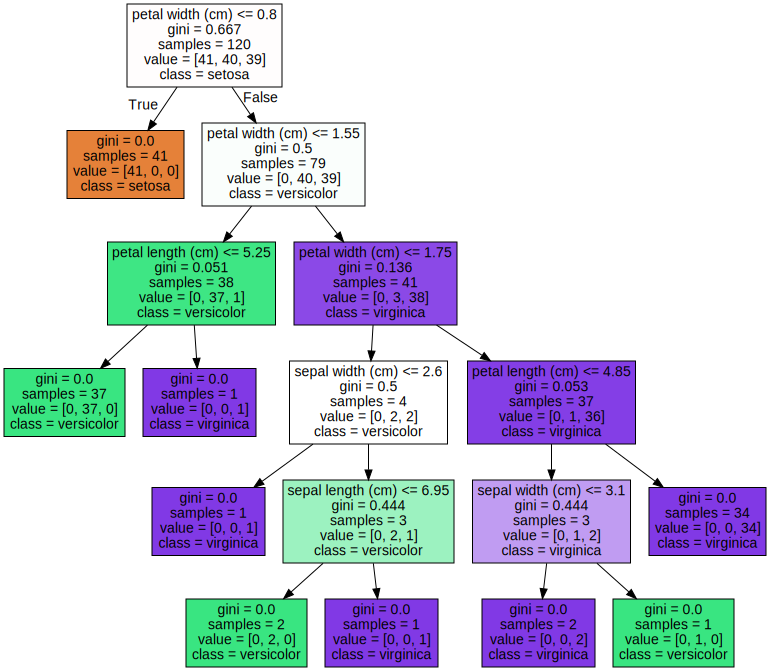

In [6]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

#정확도 확인

In [7]:
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train) # 알고 있는 데이터에 대한 예측
test_pred  = dt_clf.predict(X_test)  # 새로 보는 데이터에 대한 예측

print("훈련 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_train, train_pred)))
print("테스트 세트에 대한 점수 : {:.3f}".format(accuracy_score(y_test, test_pred)))

훈련 세트에 대한 점수 : 1.000
테스트 세트에 대한 점수 : 0.933


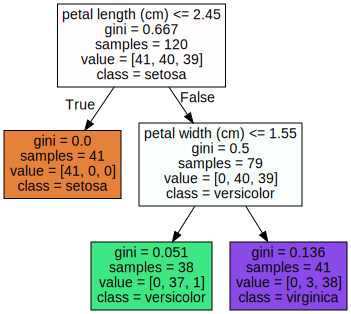

In [8]:
dt_clf_depth_2 = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
export_graphviz(
    dt_clf_depth_2, # 시각화 할 모델
    out_file="tree2.dot", # 시각화 결과물을 저장할 파일 경로
    class_names = iris_data.target_names, # 문자열로 된 클래스들의 이름
    feature_names = iris_data.feature_names, # 각 특성(feature)의 이름
    impurity=True,
    filled=True
)
with open('tree2.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

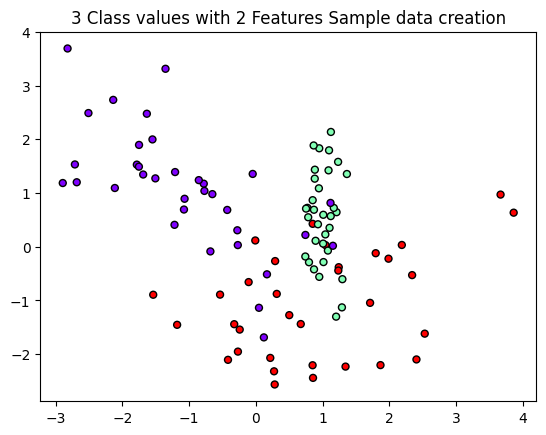

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=0
)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(
    X_features[:, 0],
    X_features[:, 1],
    marker='o',
    c=y_labels,
    s=25,
    cmap='rainbow',
    edgecolor='k'
)
plt.show()

#특성 중요도
- 어느 특성이 노드의 균일함에 많이 기여 했는가

In [10]:
dt_clf_iris = dt_clf

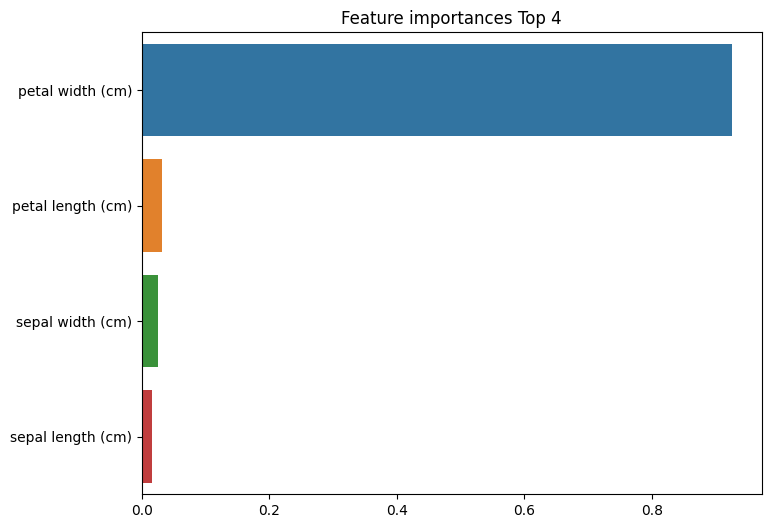

In [11]:
import pandas as pd
def plot_feature_importance(model, columns, limit=None):
  import seaborn as sns

  ftr_importances_values = model.feature_importances_
  # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
  ftr_importances = pd.Series(ftr_importances_values, index=columns  )
  # 중요도값 순으로 Series를 정렬
  ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
  plt.figure(figsize=(8,6))
  plt.title(f'Feature importances Top {len(columns) if limit == None else limit}')
  sns.barplot(x=ftr_top , y = ftr_top.index)
  plt.show()

plot_feature_importance(dt_clf_iris, iris_data.feature_names)